In [1]:
import pandas as pd
import numpy
from scipy.stats import pearsonr
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ANSWERS = ("private_answers.csv", "public_answers.csv")
BASLINES = ("baseline_kalman.csv", "baseline_wiener.csv")
UNIQUE_INDEX = ["subject_id", "trial_id", "tick_index"]

In [3]:
def score_trial(true_coordinates, predicted_coordinates, dimensions=2):
    return numpy.mean([pearsonr(numpy.diff(true_coordinates[:, axis]),
                       numpy.diff(predicted_coordinates[:, axis]))[0] for
                       axis in range(dimensions)])

In [4]:
scores = defaultdict(list)
for baseline in BASLINES:
    for answers_file in ANSWERS:
        answers = pd.read_csv(answers_file)
        trials = pd.unique(answers.trial_id)
        submission = pd.read_csv(baseline).sort_values(UNIQUE_INDEX)   
        assert(submission.shape[1] == answers.shape[1])
        for trial in trials:
            true_coordinates = answers[answers.trial_id == trial][["x", "y"]].as_matrix()[:]
            predicted_coordinates = submission[submission.trial_id == trial][["x", "y"]].as_matrix()[:]
            scores[(baseline, answers_file)].append(score_trial(true_coordinates, predicted_coordinates))
        print(baseline, answers_file, numpy.mean(scores[(baseline, answers_file)]))

baseline_kalman.csv private_answers.csv 0.547590600859
baseline_kalman.csv public_answers.csv 0.559126522416
baseline_wiener.csv private_answers.csv 0.32895721939
baseline_wiener.csv public_answers.csv 0.330119433236


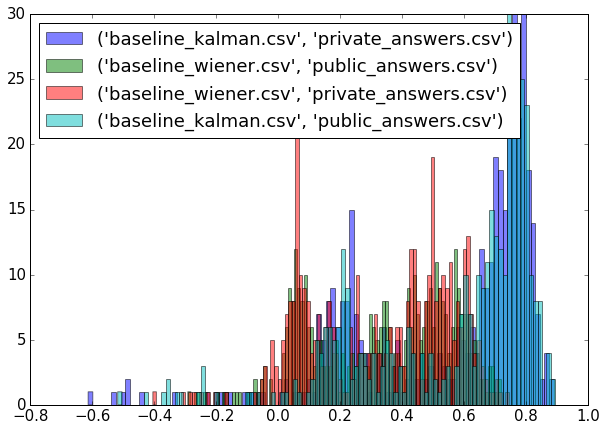

In [5]:
fig, ax = plt.subplots()
for label, scores_list in scores.items():
    ax.hist(scores_list, bins=100, alpha=0.5, label=str(label))
ax.legend(loc=2);